In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r"D:\ML\globalterrorism.csv",encoding='latin1',dtype=object)
df.head() 

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
df.shape 

(181691, 135)

In [6]:
df.columns.values 

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: object(135)
memory usage: 187.1+ MB


In [8]:
df.describe() 

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
count,181691,181691,181691,181691,9239,181691,2220,181691,181691,181691,...,28289,115500,76933,43516,181691,181691,181691,181691,181691,25038
unique,181691,47,13,32,2244,2,1859,205,205,12,...,15429,83988,62263,36090,26,3,3,3,3,14306
top,201010180005,2014,5,15,"September 18-24, 2016",0,8/4/1998,95,Iraq,10,...,Casualty numbers for this incident conflict ac...,Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...","Christopher Hewitt, ""Political Violence and Te...",START Primary Collection,-9,-9,0,-9,"201612010023, 201612010024, 201612010025, 2016..."
freq,1,16903,16875,6500,101,173452,18,24636,24636,50474,...,1607,205,134,139,78002,92527,92659,160467,83830,80


In [9]:
df.iyear.unique()  

array(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1986', '1982', '1983', '1984',
       '1985', '1987', '1988', '1989', '1990', '1991', '1992', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017'],
      dtype=object)

In [10]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [11]:
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

eventid : ['197000000001' '197000000002' '197001000001' ... '201712310030'
 '201712310031' '201712310032']
iyear : ['1970' '1971' '1972' '1973' '1974' '1975' '1976' '1977' '1978' '1979'
 '1980' '1981' '1986' '1982' '1983' '1984' '1985' '1987' '1988' '1989'
 '1990' '1991' '1992' '1994' '1995' '1996' '1997' '1998' '1999' '2000'
 '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009' '2010'
 '2011' '2012' '2013' '2014' '2015' '2016' '2017']
imonth : ['7' '0' '1' '2' '3' '4' '5' '6' '8' '9' '10' '11' '12']
iday : ['2' '0' '1' '3' '6' '8' '9' '10' '11' '12' '13' '14' '15' '19' '20' '21'
 '22' '25' '26' '27' '28' '30' '31' '4' '7' '16' '17' '18' '23' '24' '5'
 '29']
approxdate : [nan 'January 19-20, 1970' 'February 6-9, 1970' ... '2017-12-29 00:00:00'
 'December 25, 2017-January 5, 2018' '2017-12-31 00:00:00']
extended : ['0' '1']
resolution : [nan '3/8/1970' '3/15/1970' ... '3/23/2013' '12/9/2011' '12/27/2011']
country : ['58' '130' '160' '78' '101' '217' '218' '98' '499' '65' '83' 

In [12]:
df.country_txt.unique() 

array(['Dominican Republic', 'Mexico', 'Philippines', 'Greece', 'Japan',
       'United States', 'Uruguay', 'Italy', 'East Germany (GDR)',
       'Ethiopia', 'Guatemala', 'Venezuela', 'West Germany (FRG)',
       'Switzerland', 'Jordan', 'Spain', 'Brazil', 'Egypt', 'Argentina',
       'Lebanon', 'Ireland', 'Turkey', 'Paraguay', 'Iran',
       'United Kingdom', 'Colombia', 'Bolivia', 'Nicaragua',
       'Netherlands', 'Belgium', 'Canada', 'Australia', 'Pakistan',
       'Zambia', 'Sweden', 'Costa Rica', 'South Yemen', 'Cambodia',
       'Israel', 'Poland', 'Taiwan', 'Panama', 'Kuwait',
       'West Bank and Gaza Strip', 'Austria', 'Czechoslovakia', 'India',
       'France', 'South Vietnam', 'Brunei', 'Zaire',
       "People's Republic of the Congo", 'Portugal', 'Algeria',
       'El Salvador', 'Thailand', 'Haiti', 'Sudan', 'Morocco', 'Cyprus',
       'Myanmar', 'Afghanistan', 'Peru', 'Chile', 'Honduras',
       'Yugoslavia', 'Ecuador', 'New Zealand', 'Malaysia', 'Singapore',
       'Bot

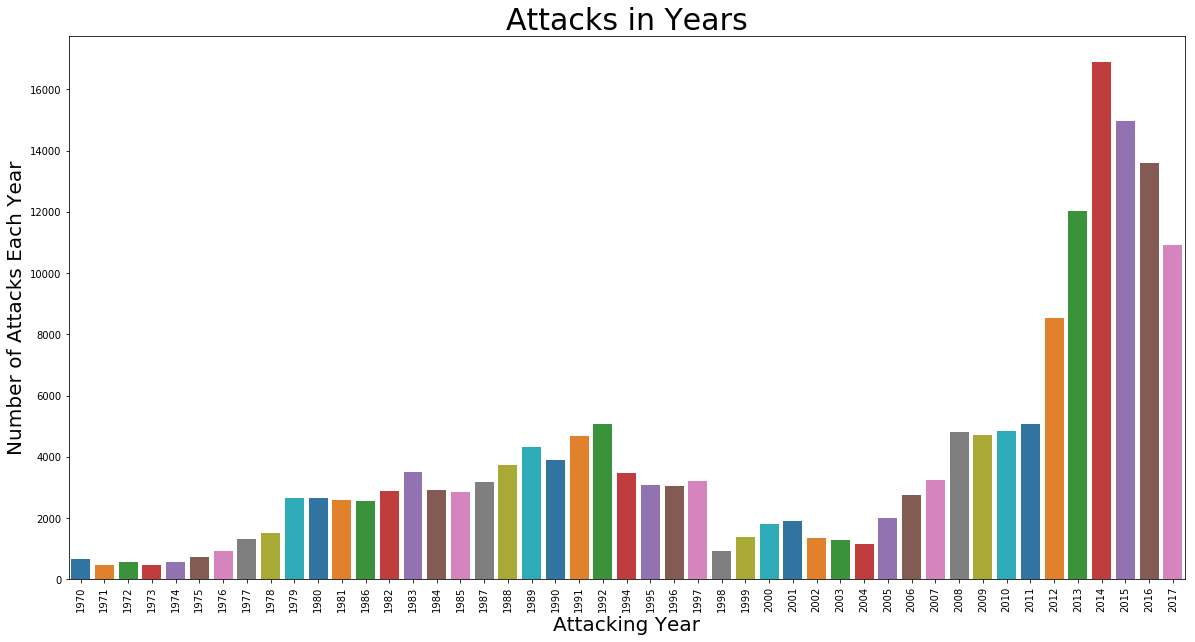

In [13]:
year = df['iyear'].unique()
years_count = df['iyear'].value_counts(dropna = False).sort_index()

plt.figure(figsize= (20, 10))
sns.barplot(x= year, y = years_count, palette= "tab10")

plt.xticks(rotation = 90)
plt.xlabel('Attacking Year', fontsize = 20)
plt.ylabel('Number of Attacks Each Year', fontsize = 20)
plt.title('Attacks in Years', fontsize = 30)
plt.show()

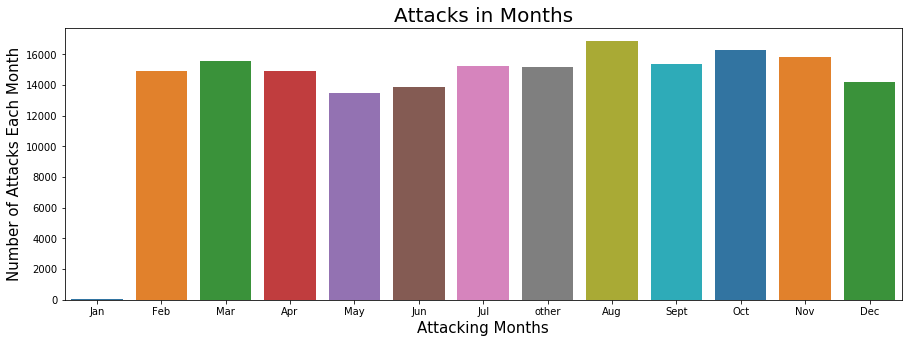

In [14]:
Month = df['imonth'].unique()
Months_count = df['imonth'].value_counts(dropna = False).sort_index()
positions = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
labels= ("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "other", "Aug", "Sept", "Oct", "Nov", "Dec" )

plt.figure(figsize= (15, 5))
sns.barplot(x= Month, y = Months_count, palette= "tab10")

plt.xticks(positions, labels, fontsize=10, rotation = 0)

plt.xlabel('Attacking Months', fontsize = 15)
plt.ylabel('Number of Attacks Each Month', fontsize = 15)
plt.title('Attacks in Months', fontsize = 20)
plt.show()

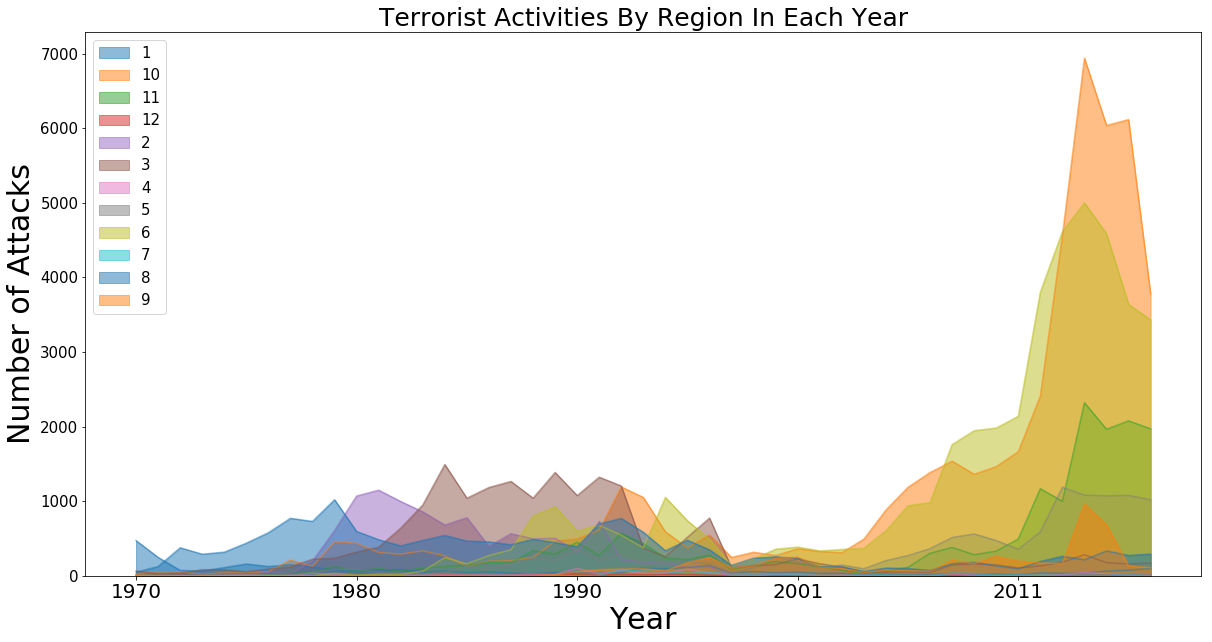

In [15]:
pd.crosstab(df.iyear, df.region).plot(kind='area',stacked=False,figsize=(20,10))

plt.xticks(fontsize=20)
plt.yticks(fontsize=15)

plt.title('Terrorist Activities By Region In Each Year',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=30)
plt.xlabel("Year",fontsize=30)
plt.legend(loc='upper left', fontsize=15)
plt.show()

In [16]:
attack = df.country.value_counts()[:10]
attack

95     24636
153    14368
4      12731
92     11960
45      8306
160     6908
159     6096
61      5320
603     5235
209     4292
Name: country, dtype: int64

In [17]:
df.gname.value_counts()[1:10]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: gname, dtype: int64

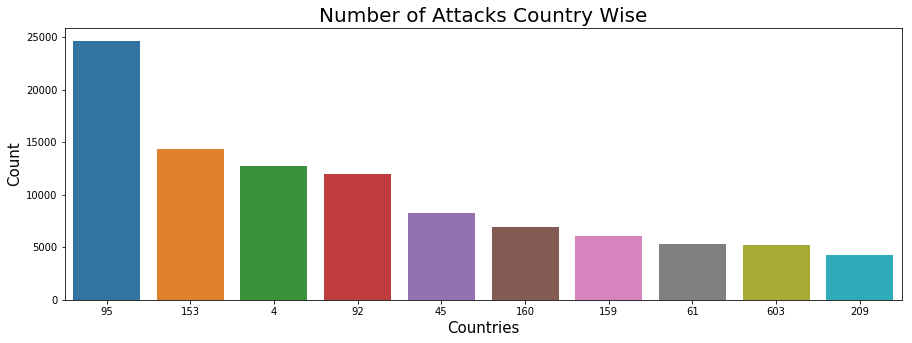

In [18]:
plt.figure(figsize= (15,5))

sns.barplot(attack.index,attack)
plt.title('Number of Attacks Country Wise', fontsize = 20)
plt.xlabel('Countries', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

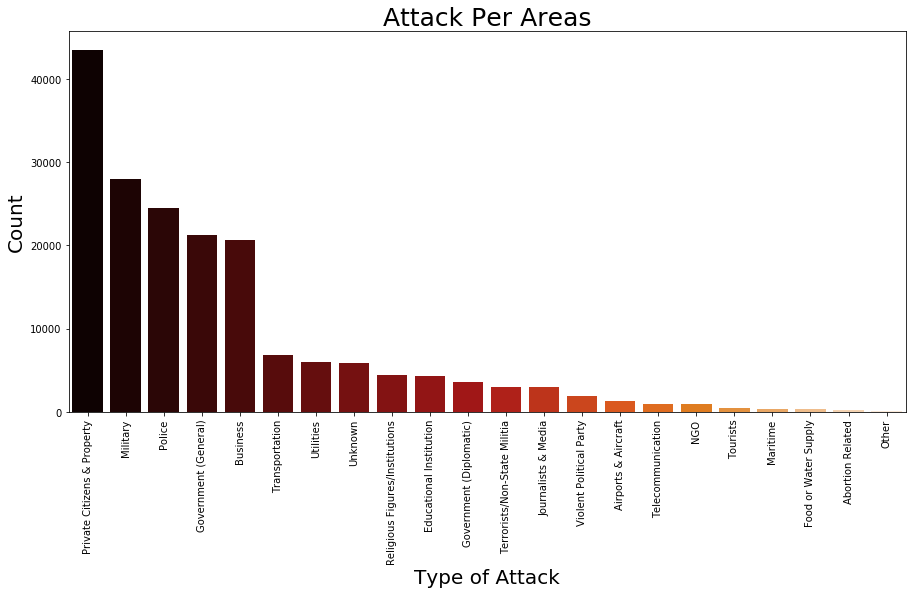

In [19]:
plt.figure(figsize=(15, 7))
sns.countplot(df.targtype1_txt, order= df.targtype1_txt.value_counts().index, palette="gist_heat")

plt.xticks(rotation= 90)
plt.xlabel('Type of Attack', fontsize= 20)
plt.ylabel('Count', fontsize= 20)
plt.title('Attack Per Areas', fontsize= 25)

plt.show()

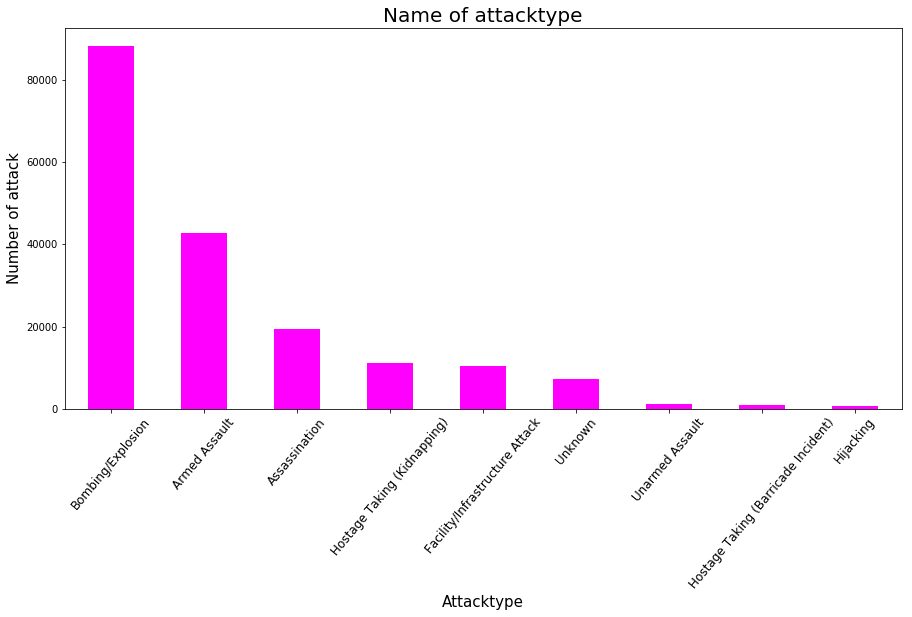

In [20]:
df['attacktype1_txt'].value_counts().plot(kind='bar',figsize=(15,7),color='magenta')
plt.xticks(rotation = 50, fontsize =12)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Name of attacktype",fontsize=20)
plt.show()

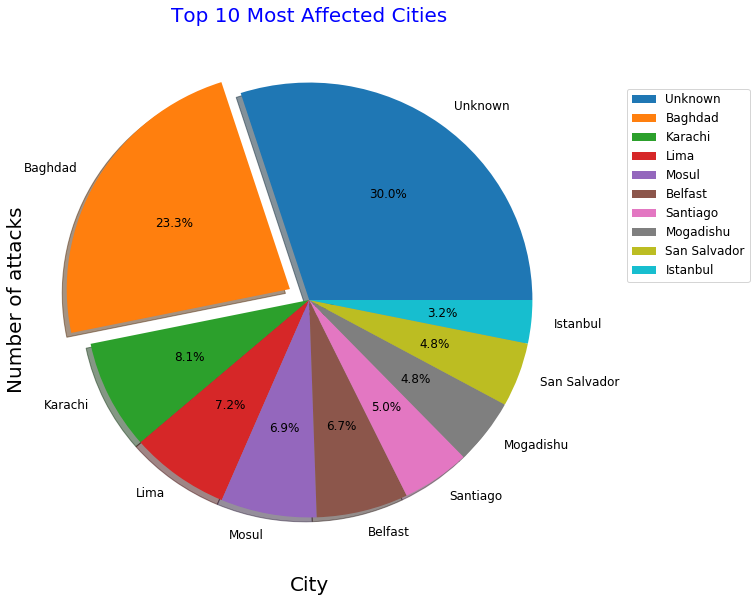

In [21]:
explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0)
df['city'].value_counts().to_frame().sort_values('city', axis=0, ascending= False).head(10).plot(kind= 'pie',
                                                subplots=True, explode = explode,figsize=(10,10), shadow=True, 
                                                textprops={'fontsize':12,'weight':'light','color':'k'},
                                                autopct='%1.1f%%')

plt.xticks(rotation = 50)
plt.xlabel('City', fontsize=20)
plt.ylabel('Number of attacks', fontsize= 20)
plt.title('Top 10 Most Affected Cities', fontsize= 20, color= 'b')
plt.legend(loc='upper right', bbox_to_anchor =(1.3,0.9), fontsize=12)  #location of legend
plt.show()


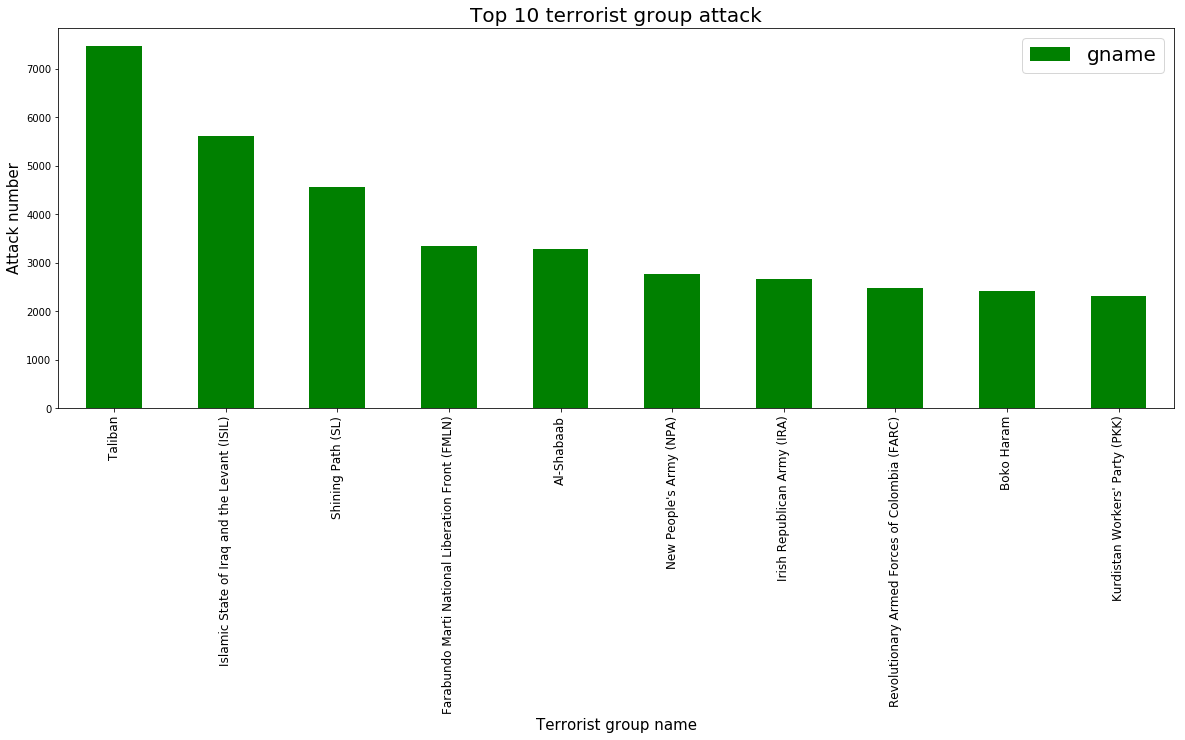

In [22]:
df['gname'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='green',figsize=(20,7))

plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("Terrorist group name",fontsize=15)
plt.ylabel("Attack number",fontsize=15)
plt.xticks(fontsize= 12)
plt.legend(fontsize =20)
plt.show()


## INFERENCE:
 Increase in terrorism worldwide (years) : 2012-2017
 
 City with highest attacks: Baghdad
 
 Highest attack types: Bombing/explosion
 
 Terroist group with highest number of attacks: Taliban
 
 Area-wise highest concentration of attacks: private citizens and properties
 
 Most targetted country: Iraq